In [1]:
# ============== IMPORT LIBRARIES ==============
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ============== DATA PREPARATION ==============
data = {
    'Fund': ['HDFC Top 100', 'Axis Bluechip', 'Mirae Large Cap', 'Sundaram Small Cap',
             'Kotak Emerging', 'ICICI Bluechip', 'Nippon Small Cap', 'Parag Parikh Flexi',
             'Tata Digital', 'UTI Nifty Index'] * 3,
    'Year': [2020]*10 + [2021]*10 + [2022]*10,
    'Return': [18.5, 16.8, 17.9, 21.4, 20.1, 15.6, 22.3, 19.7, 24.5, 12.8,
              14.2, 13.5, 15.3, 18.6, 16.4, 12.8, 19.2, 16.1, 20.3, 10.5,
              16.1, 15.2, 14.8, 19.1, 17.8, 14.3, 20.5, 17.4, 22.1, 11.9],
    'SD': [1.12, 0.98, 1.05, 1.42, 1.30, 0.92, 1.50, 1.20, 1.60, 0.85,
           1.08, 0.95, 1.03, 1.38, 1.25, 0.89, 1.45, 1.15, 1.55, 0.82,
           1.15, 1.02, 1.10, 1.45, 1.32, 0.95, 1.52, 1.22, 1.65, 0.88],
    'Sharpe': [1.82, 1.75, 1.88, 2.30, 2.10, 1.65, 2.40, 2.05, 2.60, 1.30,
               1.61, 1.58, 1.72, 2.15, 1.95, 1.50, 2.20, 1.90, 2.40, 1.20,
               1.70, 1.68, 1.65, 2.25, 2.05, 1.58, 2.35, 1.98, 2.55, 1.25],
    'Treynor': [14.3, 12.9, 13.7, 16.5, 15.0, 12.0, 17.0, 14.8, 18.2, 9.5,
                12.5, 11.8, 12.9, 15.2, 14.2, 11.2, 16.1, 13.9, 17.0, 8.8,
                13.0, 12.4, 12.1, 15.8, 14.9, 11.8, 16.8, 14.5, 17.9, 9.2]
}

# creating dataframe
df = pd.DataFrame(data)

# Add fund categories
category_map = {
    'HDFC Top 100': 'Large Cap',
    'Axis Bluechip': 'Large Cap',
    'Mirae Large Cap': 'Large Cap',
    'ICICI Bluechip': 'Large Cap',
    'Sundaram Small Cap': 'Small Cap',
    'Kotak Emerging': 'Small Cap',
    'Nippon Small Cap': 'Small Cap',
    'Parag Parikh Flexi': 'Flexi Cap',
    'Tata Digital': 'Sectoral',
    'UTI Nifty Index': 'Index'
}
df['Category'] = df['Fund'].map(category_map)

df

,Fund,Year,Return,SD,Sharpe,Treynor,Category
0,HDFC Top 100,2020,18.5,1.12,1.82,14.3,Large Cap
1,Axis Bluechip,2020,16.8,0.98,1.75,12.9,Large Cap
2,Mirae Large Cap,2020,17.9,1.05,1.88,13.7,Large Cap
3,Sundaram Small Cap,2020,21.4,1.42,2.30,16.5,Small Cap
4,Kotak Emerging,2020,20.1,1.30,2.10,15.0,Small Cap
5,ICICI Bluechip,2020,15.6,0.92,1.65,12.0,Large Cap
6,Nippon Small Cap,2020,22.3,1.50,2.40,17.0,Small Cap
7,Parag Parikh Flexi,2020,19.7,1.20,2.05,14.8,Flexi Cap
8,Tata Digital,2020,24.5,1.60,2.60,18.2,Sectoral
9,UTI Nifty Index,2020,12.8,0.85,1.30,9.5,Index


In [3]:
# ================== ANOVA for Sharpe and Treynor ==================
def anova_table(data, value_col, group_col):
    # One-way ANOVA using scipy
    groups = [group[value_col].values for name, group in data.groupby(group_col)]
    f_val, p_val = stats.f_oneway(*groups)

    # Calculate ANOVA components manually
    grand_mean = data[value_col].mean()
    n_total = data.shape[0]
    k = data[group_col].nunique()

    # Between groups
    ss_between = sum(group.shape[0] * (group[value_col].mean() - grand_mean)**2
                     for _, group in data.groupby(group_col))
    df_between = k - 1
    ms_between = ss_between / df_between

    # Within groups
    ss_within = sum(((group[value_col] - group[value_col].mean())**2).sum()
                    for _, group in data.groupby(group_col))
    df_within = n_total - k
    ms_within = ss_within / df_within

    # Total
    ss_total = ((data[value_col] - grand_mean)**2).sum()
    df_total = n_total - 1

    # Create result table
    anova_results = pd.DataFrame({
        'Source': ['Between Groups (Funds)', 'Within Groups (Error)', 'Total'],
        'Sum of Squares': [ss_between, ss_within, ss_total],
        'df': [df_between, df_within, df_total],
        'Mean Square': [ms_between, ms_within, ''],
        'F-Value': [f_val, '', ''],
        'p-value': [p_val, '', '']
    })

    return anova_results

# ANOVA for Sharpe Ratio
anova_sharpe = anova_table(df, 'Sharpe', 'Fund')
print("ANOVA for Sharpe Ratio")
print(anova_sharpe)

# ANOVA for Treynor Ratio
anova_treynor = anova_table(df, 'Treynor', 'Fund')
print("\nANOVA for Treynor Ratio")
print(anova_treynor)

ANOVA for Sharpe Ratio
                   Source  Sum of Squares  df Mean Square   F-Value p-value
0  Between Groups (Funds)        3.981267   9    0.442363  55.71322     0.0
1   Within Groups (Error)        0.158800  20     0.00794                  
2                   Total        4.140067  29                              

ANOVA for Treynor Ratio
                   Source  Sum of Squares  df Mean Square    F-Value p-value
0  Between Groups (Funds)      173.009667   9   19.223296  54.303097     0.0
1   Within Groups (Error)        7.080000  20       0.354                   
2                   Total      180.089667  29                               


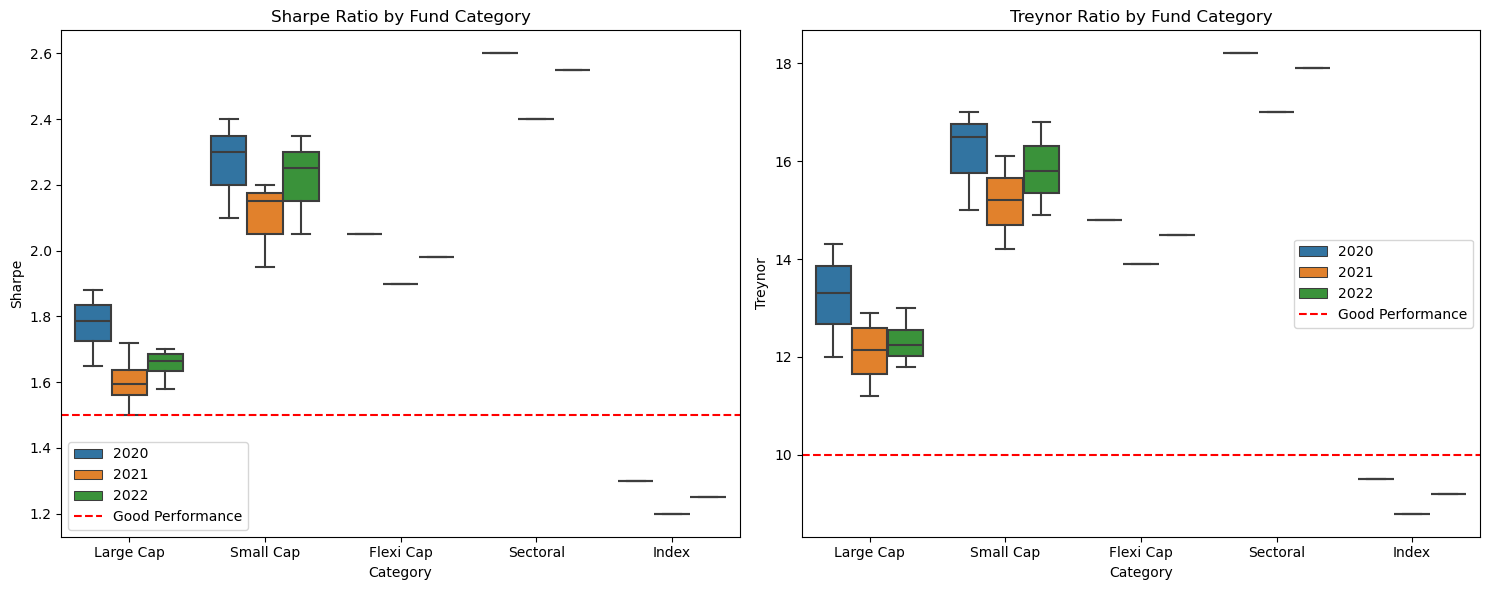


Category-wise Performance Summary:


Return              Sharpe          Treynor      
                mean       std      mean   max       mean   max
Category                                                       
Flexi Cap  17.733333  1.823001  1.976667  2.05  14.400000  14.8
Index      11.733333  1.159023  1.250000  1.30   9.166667   9.5
Large Cap  15.416667  1.699643  1.676667  1.88  12.550000  14.3
Sectoral   22.300000  2.107131  2.516667  2.60  17.700000  18.2
Small Cap  19.488889  1.815520  2.194444  2.40  15.722222  17.0


Year-wise Best Performers:

Top 3 Funds in 2020:


,Fund,Category,Return,Sharpe,Treynor
8,Tata Digital,Sectoral,24.5,2.6,18.2
6,Nippon Small Cap,Small Cap,22.3,2.4,17.0
3,Sundaram Small Cap,Small Cap,21.4,2.3,16.5



Top 3 Funds in 2021:


,Fund,Category,Return,Sharpe,Treynor
18,Tata Digital,Sectoral,20.3,2.40,17.0
16,Nippon Small Cap,Small Cap,19.2,2.20,16.1
13,Sundaram Small Cap,Small Cap,18.6,2.15,15.2



Top 3 Funds in 2022:


,Fund,Category,Return,Sharpe,Treynor
28,Tata Digital,Sectoral,22.1,2.55,17.9
26,Nippon Small Cap,Small Cap,20.5,2.35,16.8
23,Sundaram Small Cap,Small Cap,19.1,2.25,15.8


In [4]:
# ============== VISUALIZATIONS ==============
plt.figure(figsize=(15, 6))

# 1. Sharpe Ratio by Category
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Category', y='Sharpe', hue='Year')
plt.title('Sharpe Ratio by Fund Category')
plt.axhline(y=1.5, color='r', linestyle='--', label='Good Performance')
plt.legend()

# 2. Treynor Ratio by Category
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Category', y='Treynor', hue='Year')
plt.title('Treynor Ratio by Fund Category')
plt.axhline(y=10, color='r', linestyle='--', label='Good Performance')
plt.legend()

plt.tight_layout()
plt.show()

# ============== ADDITIONAL STATISTICS ==============
print("\nCategory-wise Performance Summary:")
display(df.groupby('Category').agg({
    'Return': ['mean', 'std'],
    'Sharpe': ['mean', 'max'],
    'Treynor': ['mean', 'max']
}))

print("\nYear-wise Best Performers:")
for year in [2020, 2021, 2022]:
    print(f"\nTop 3 Funds in {year}:")
    display(df[df['Year'] == year].nlargest(3, 'Sharpe')[['Fund', 'Category', 'Return', 'Sharpe', 'Treynor']])